In [1]:
import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt

# Load data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleaning
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

# Filter and add an index column

In [2]:
df_DA_US = df[(df['job_country'] == 'United States') & (df['job_title_short'] == 'Data Analyst')]

# add an index column for job_id
df_DA_US = df_DA_US.reset_index(drop=True)
df_DA_US['job_id'] = df_DA_US.index

# Explode job skills

In [3]:
df_DA_US_exploded = df_DA_US.explode('job_skills')

# Create binary matrix (job id x job skill)

In [4]:
# create a job-skill matrix with the job_id as a unique identifier
job_skill_matrix = pd.crosstab( df_DA_US_exploded['job_id'], df_DA_US_exploded['job_skills'])
job_skill_matrix

job_skills,airflow,airtable,alteryx,angular,ansible,apl,arch,asana,asp.net,asp.net core,...,watson,webex,windows,wire,word,workfront,wrike,xamarin,yarn,zoom
job_id,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
5,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67810,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
67811,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
67812,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Transpose matrix

In [5]:
skill_occurrence = job_skill_matrix.T.dot(job_skill_matrix)

# Determine top 10 occurrences

In [6]:
# take the top 10 occurrences
skill_count = df_DA_US_exploded['job_skills'].value_counts()
top_skills = skill_count.head(10).index

In [7]:
skill_occurrence = skill_occurrence.loc[top_skills, top_skills]
skill_occurrence

job_skills,sql,excel,tableau,python,sas,r,power bi,word,powerpoint,oracle
job_skills,,,,,,,,,,
sql,34452,15314,14408,14335,9390,8450,8234,3399,3515,3847
excel,15314,27519,9117,6665,6564,4496,6199,6862,6808,2093
tableau,14408,9117,19311,8920,5608,5709,6503,1975,2536,2178
python,14335,6665,8920,18382,6034,9630,4405,1540,1731,1726
sas,9390,6564,5608,6034,26400,6614,2144,2116,2026,1520
r,8450,4496,5709,9630,6614,11659,2907,1088,1281,868
power bi,8234,6199,6503,4405,2144,2907,11630,1301,1539,1236
word,3399,6862,1975,1540,2116,1088,1301,7611,4448,712
powerpoint,3515,6808,2536,1731,2026,1281,1539,4448,7175,653


# Calculate skill co-occurrence percentage

In [15]:
DA_skill_percent= skill_occurrence.div(skill_occurrence.max(axis=1), axis=0) * 100

# Heat map to visualize

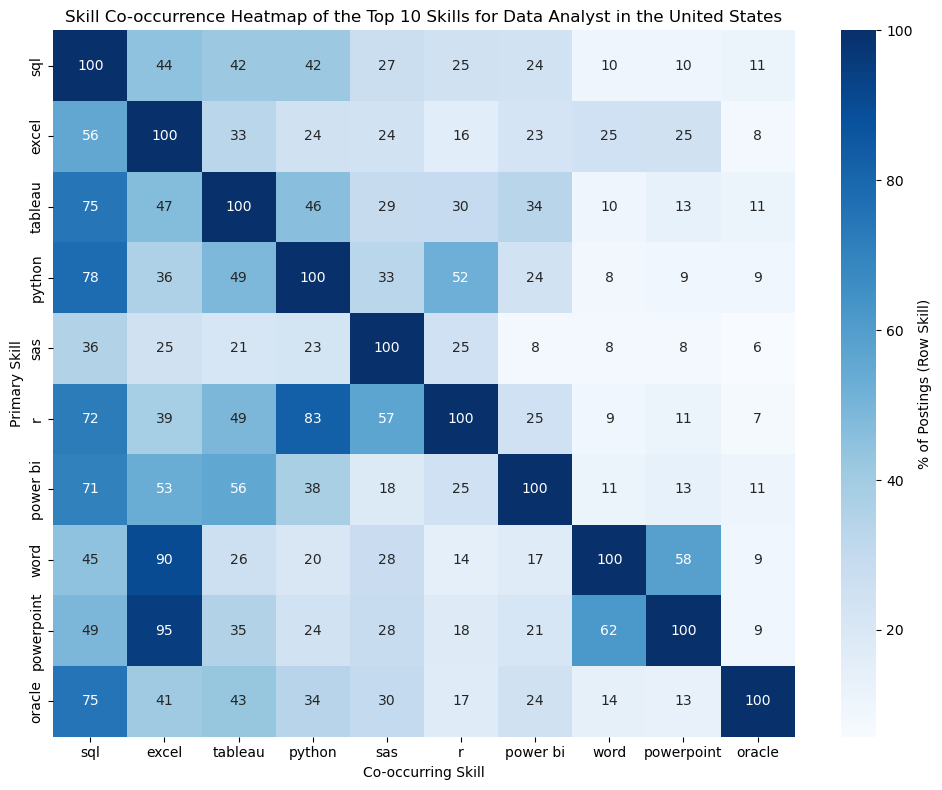

In [29]:
plt.figure(figsize=(10, 8))
sns.heatmap(DA_skill_percent, cmap="Blues", annot=True, fmt=".0f", cbar_kws={'label': '% of Postings (Row Skill)'})

# add labels
plt.title("Skill Co-occurrence Heatmap of the Top 10 Skills for Data Analyst in the United States")
plt.xlabel("Co-occurring Skill")
plt.ylabel("Primary Skill")
plt.tight_layout()
plt.show()